In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 25, 12), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25, 12), max_iter=600, random_state=42)

In [4]:
# Make predictions
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


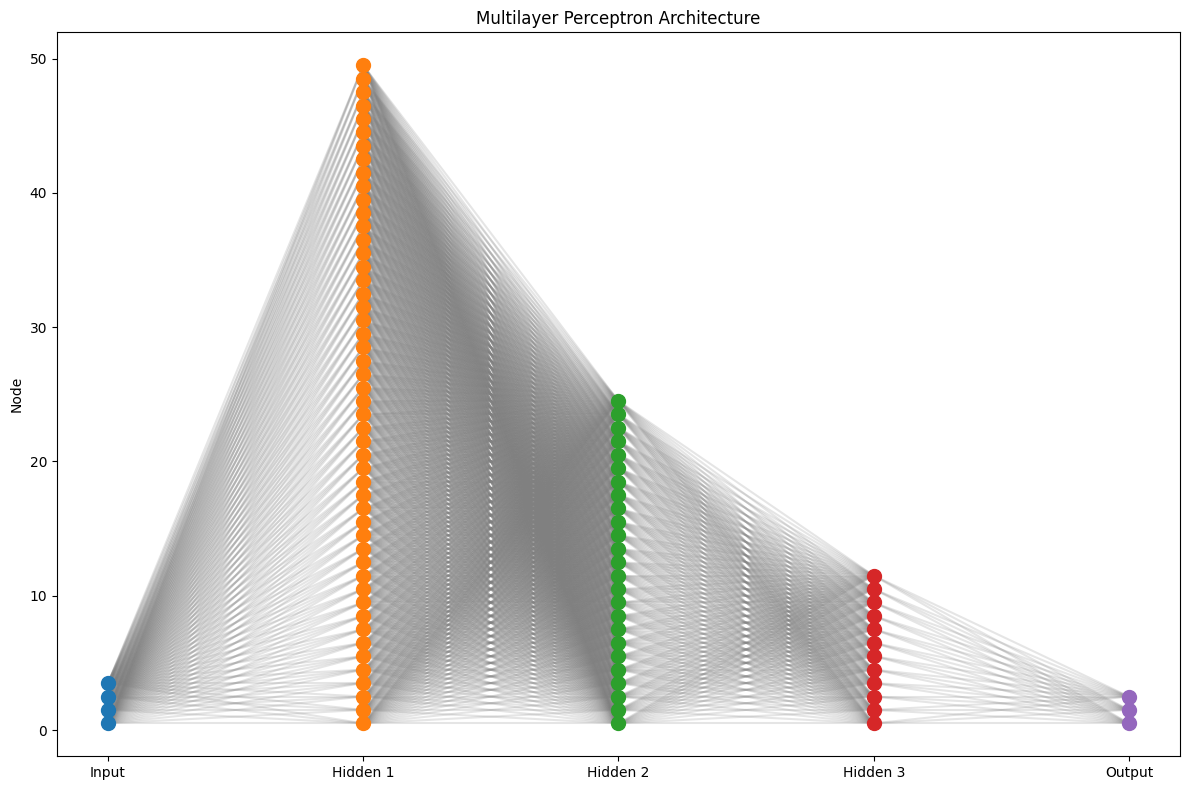

In [6]:
 #Function to plot the MLP architecture
def plot_mlp(mlp):
    # Get the number of layers and their sizes
    layer_sizes = [mlp.n_features_in_] + list(mlp.hidden_layer_sizes) + [mlp.n_outputs_]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_nodes = np.arange(layer_size) + 0.5
        ax.scatter([i] * layer_size, layer_nodes, s=100, zorder=4)
    
    # Plot edges
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                ax.plot([i, i + 1], [j + 0.5, k + 0.5], 'gray', alpha=0.2)
    
    # Set labels and title
    ax.set_xticks(range(len(layer_sizes)))
    ax.set_xticklabels(['Input'] + [f'Hidden {i+1}' for i in range(len(layer_sizes) - 2)] + ['Output'])
    ax.set_ylabel('Node')
    ax.set_title('Multilayer Perceptron Architecture')
    
    plt.tight_layout()
    plt.show()

# Plot the MLP architecture
plot_mlp(mlp)